In [1]:
#Leamos el archivo con la ayuda de geopandas:
import os
os.environ['USE_PYGEOS'] = '0' # only if you have pygeos

import geopandas as gpd
from  fiona import listlayers

#Guardamos los mapas
MexicoMaps='https://github.com/AyeliAlp/world_mexico/raw/main/maps/worldMaps.gpkg'

#Vemos las capas que hay en el mapa
listlayers(MexicoMaps)

['countries', 'cities', 'rivers']

In [2]:
#Recuperamos cada capa del mapa
countries=gpd.read_file(MexicoMaps,layer='countries')
cities=gpd.read_file(MexicoMaps,layer='cities')
rivers=gpd.read_file(MexicoMaps,layer='rivers')

In [3]:
#Nos aseguramos de que tengan el mismo CRS
countries.crs.to_epsg()==cities.crs.to_epsg()==rivers.crs.to_epsg()

True

<Axes: >

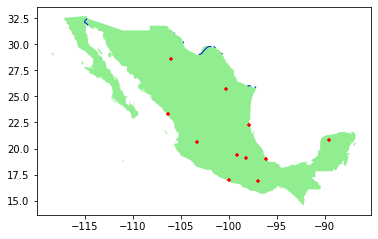

In [4]:
#Creación de subconjuntos de mapas para mantener el país (Mexico):
#Guardamos al pais Mexico
mexico=countries[countries.COUNTRY=='Mexico']

#Recortamos
mexico_rivers = gpd.clip(gdf=rivers,mask=mexico)
mexico_cities= gpd.clip(gdf=cities,mask=mexico)


#Graficamos 
base = mexico.plot(facecolor="lightgreen")
mexico_rivers.plot(edgecolor='blue', linewidth=0.95,ax=base)
mexico_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [5]:
#Ejercicio 1
#Calcule el centroide del mapa de su país.

#Si recibe una advertencia en el paso anterior, detecte la proyección actual. Si no hay ninguna información de CRS, DETÉNGASE. Si obtiene un CRS, continúe.

#Busque el CRS correcto para su mapa, para que obtenga un mapa proyectado.

#Restablecer el CRS.

#Traza tanto el mapa reproyectado como su centroide.

In [5]:
#La unidad está en grados:
mexico.crs.axis_info

[Axis(name=Geodetic latitude, abbrev=Lat, direction=north, unit_auth_code=EPSG, unit_code=9122, unit_name=degree),
 Axis(name=Geodetic longitude, abbrev=Lon, direction=east, unit_auth_code=EPSG, unit_code=9122, unit_name=degree)]

In [6]:
#Calculamos el centroide del mapa no proyectado, pero nos damos cuenta que nos indica que hay un error con el que debemos tener cuidado
mexico.centroid

<ipython-input-6-af61c77faabb>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mexico.centroid


154 POINT (-102.53287 23.95046)
dtype: geometry

In [7]:
#Reproyectamos el mapa 
mexico.to_crs(3587).crs.axis_info

[Axis(name=Easting, abbrev=X, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=Y, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [8]:
#Las operaciones que requieren CRS proyectado funcionarán:
#Calculamos el centroide del mapa proyectado
mexico.to_crs(3587).centroid

154 POINT (4123062.978 -2020077.556)
dtype: geometry

<Axes: >

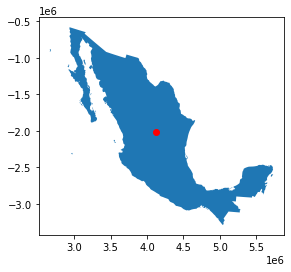

In [9]:
#Trazamos la version proyectada

base3587=mexico.to_crs(3587).plot()
mexico.to_crs(3587).centroid.plot(color='red',ax=base3587)

In [10]:
#Usamos el crs 3587 como opción de emergencia para reproyectar un mapa. Sin embargo, 
#para una opción más precisa, es mejor buscar las preparadas explícitamente para una ubicación particular del mundo. 
#Puede solicitar un crs por país en la pagina indicada en paideia: 
#recommended for Mexico (metros)
mexico.to_crs(6366).crs.axis_info

[Axis(name=Easting, abbrev=E, direction=east, unit_auth_code=EPSG, unit_code=9001, unit_name=metre),
 Axis(name=Northing, abbrev=N, direction=north, unit_auth_code=EPSG, unit_code=9001, unit_name=metre)]

In [11]:
#Al calcular el centroide de la version 6366 nos damos cuenta que este no tiene error
mexico.to_crs(6366).centroid

154 POINT (2067683.329 2700391.085)
dtype: geometry

<Axes: >

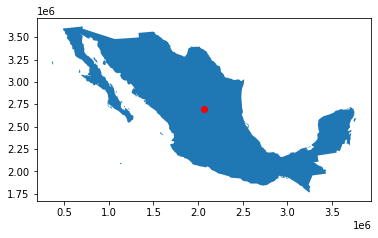

In [12]:
#Reproyectamos:

base6362=mexico.to_crs(6366).plot()
mexico.to_crs(6366).centroid.plot(color='red',ax=base6362)

<ipython-input-13-ac2d998139ef>:11: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  mexico.centroid.plot(color='red',ax=ax2)


<Axes: title={'center': 'unprojected'}>

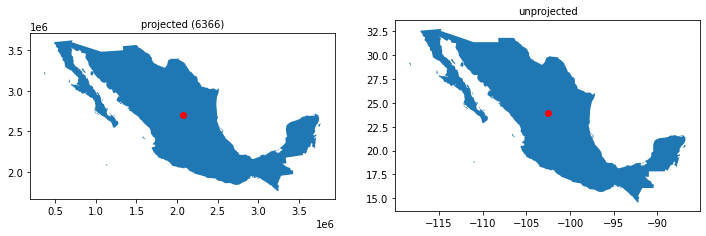

In [13]:
#No usar la proyección correcta le dará un resultado numérico incorrecto cuando necesite precisión numérica; sin embargo, 
#es posible que encuentre una situación en la que la salida visual parezca correcta (pero no sea correcta):
#Trazamos ambos mapas.
from matplotlib import pyplot

fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

ax1.set_title('projected (6366)',fontsize=10)
mexico.to_crs(6366).plot(ax=ax1)
mexico.to_crs(6366).centroid.plot(color='red',ax=ax1)

ax2.set_title('unprojected',fontsize=10)
mexico.plot(ax=ax2)
mexico.centroid.plot(color='red',ax=ax2)

In [14]:
#Mantenemos la versión proyectada para todos nuestros mapas:
mexico_6366=mexico.to_crs(6366)
# solo mexico

cities_6366=cities.to_crs(mexico_6366.crs)
cities_6366=cities_6366[cities_6366.COUNTRY=='Mexico']

rivers_6366=rivers.to_crs(mexico_6366.crs)
rivers_6366=gpd.clip(gdf=rivers_6366,mask=mexico_6366)

In [15]:
#Guardamos el mapa proyectado correctamente
import os

mexico_6366.to_file(os.path.join("maps","mexicoMaps_6366.gpkg"), layer='country', driver="GPKG")
cities_6366.to_file(os.path.join("maps","mexicoMaps_6366.gpkg"), layer='cities', driver="GPKG")
rivers_6366.to_file(os.path.join("maps","mexicoMaps_6366.gpkg"), layer='rivers', driver="GPKG")

In [16]:
#Ejercicio 2
#Seleccione uno de sus GDF con varios polígonos.

#Recuperar solo los límites de ese GDF.

#Convierte el límite en un GDF.

In [17]:
#Sabemos que mexico_6366 es un multipoligono
mexico_6366

,COUNTRY,geometry
154,Mexico,"MULTIPOLYGON (((2507451.306 2593509.372, 25079..."


In [18]:
#Solo necesitamos los bordes del 
mexico_6366.boundary

154 MULTILINESTRING ((2507451.306 2593509.372, 250...
dtype: geometry

<Axes: >

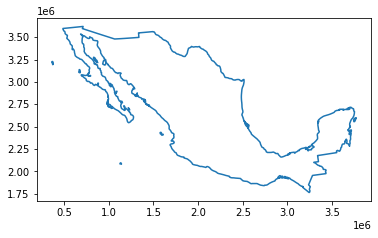

In [19]:
#Trazamos solo el limite del mapa proyectado
mexico_6366.boundary.plot() 

In [20]:
#Comprobamos el tipo de datos
type(mexico_6366.boundary)

geopandas.geoseries.GeoSeries

In [21]:
#Algunas operaciones en geopandas requieren GDF o GS. Si necesita un GDF en lugar de un GS:
#Convertimos en GDF
mexico_6366.boundary.to_frame()

,0
154,"MULTILINESTRING ((2507451.306 2593509.372, 250..."


In [22]:
#Obtenemos un GDF muy simple, y si queremos agregar algo de información:
#Convertimos
mexico_6366DF=mexico_6366.boundary.to_frame() 

#Nueva columna
mexico_6366DF['name']='Mexico' 

#Cambiamos el nombre de la columna de geometría
mexico_6366DF.rename(columns={0:'geometry'},inplace=True) 

#establecemos la geometría (el nombre no es suficiente)
brasil_5641DF = brasil_5641DF.set_geometry("geometría")
mexico_6366DF = mexico_6366DF.set_geometry("geometry")

# Verificamos:
mexico_6366DF.crs

<Projected CRS: EPSG:6366>
Name: Mexico ITRF2008 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Mexico west of 114°W, onshore and offshore.
- bounds: (-122.19, 15.01, -114.0, 32.72)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [23]:
mexico_6366DF

,geometry,name
154,"MULTILINESTRING ((2507451.306 2593509.372, 250...",Mexico


In [24]:
#Agregamos este GDF como una capa:
mexico_6366DF.to_file(os.path.join("maps","mexicoMaps_6366.gpkg"), layer='border', driver="GPKG")

In [25]:
#Ejercicio 3
#Consulta todos los CRS de tus GDF.

#Si encuentra que falta un CRS, llene el CRS con la proyección correcta.

In [26]:
#Descargamos el archivo de forma de Mexico-Limites administrativos subnacionales desde la pagina que nos brindó el profesor
#Guardamos en la carpeta "mapas" y descomprimimos el archivo
mexico_states=gpd.read_file(os.path.join("maps","mex_adm_ibge_2020_shp","mex_admbnda_adm1_govmex_20210618.shp"))
mexico_municipalities=gpd.read_file(os.path.join("maps","mex_adm_ibge_2020_shp","mex_admbnda_adm2_govmex_20210618.shp"))

In [88]:
#Notamos esto: (Explicar profesor)
mexico_states.crs, mexico_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

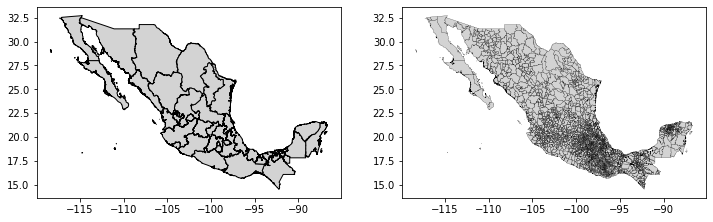

In [28]:
#Sin embargo, no tienen información de crs:
#Trazamos: 
fig, (ax1, ax2) = pyplot.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

mexico_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
mexico_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)

In [89]:
mexico_states

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Aguascalientes,MX01,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,3.993483,0.491151,"POLYGON ((-102.28787 22.41649, -102.28753 22.4..."
1,Baja California,MX02,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,29.414983,6.851318,"MULTIPOLYGON (((-114.12880 28.01224, -114.1283..."
2,Baja California Sur,MX03,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,51.783353,6.486020,"MULTIPOLYGON (((-109.91027 22.87937, -109.9102..."
3,Campeche,MX04,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,27.833408,4.757845,"MULTIPOLYGON (((-91.55007 18.28726, -91.55142 ..."
4,Chiapas,MX07,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,26.835058,6.150488,"MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ..."
5,Chihuahua,MX08,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,30.076365,22.873546,"POLYGON ((-106.55794 31.78388, -106.52852 31.7..."
6,Coahuila de Zaragoza,MX05,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,22.963062,13.822337,"POLYGON ((-102.31079 29.87695, -102.31050 29.8..."
7,Colima,MX06,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,6.242778,0.494913,"MULTIPOLYGON (((-114.72650 18.36037, -114.7219..."
8,Distrito Federal,MX09,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,1.920709,0.128447,"POLYGON ((-99.11124 19.56150, -99.11485 19.557..."
9,Durango,MX10,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,23.712606,11.026861,"POLYGON ((-105.96732 26.78554, -105.93919 26.7..."


In [90]:
#Como estamos usando el crs 6366, lo utilizamos tambien para los estados de mexico
mexico_states.to_crs(6366)

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry
0,Aguascalientes,MX01,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,3.993483,0.491151,"POLYGON ((2026084.880 2554791.668, 2026125.083..."
1,Baja California,MX02,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,29.414983,6.851318,"MULTIPOLYGON (((782338.366 3101882.423, 782383..."
2,Baja California Sur,MX03,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,51.783353,6.486020,"MULTIPOLYGON (((1228515.611 2547751.767, 12285..."
3,Campeche,MX04,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,27.833408,4.757845,"MULTIPOLYGON (((3263538.986 2224141.861, 32633..."
4,Chiapas,MX07,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,26.835058,6.150488,"MULTIPOLYGON (((3172789.714 1829557.498, 31727..."
5,Chihuahua,MX08,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,30.076365,22.873546,"POLYGON ((1491061.126 3564376.711, 1493867.844..."
6,Coahuila de Zaragoza,MX05,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,22.963062,13.822337,"POLYGON ((1926343.519 3397513.528, 1926372.665..."
7,Colima,MX06,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,6.242778,0.494913,"MULTIPOLYGON (((740236.078 2031558.340, 740718..."
8,Distrito Federal,MX09,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,1.920709,0.128447,"POLYGON ((2400523.265 2264634.533, 2400178.158..."
9,Durango,MX10,NaN,NaN,NaN,México,MX,2020-06-23,2021-06-18,NaN,23.712606,11.026861,"POLYGON ((1600735.599 3010831.682, 1603782.341..."


In [91]:
#Conocemos la proyeccion real de la geomretria de los estados
mexico_states.geometry

0 POLYGON ((-102.28787 22.41649, -102.28753 22.4...
1 MULTIPOLYGON (((-114.12880 28.01224, -114.1283...
2 MULTIPOLYGON (((-109.91027 22.87937, -109.9102...
3 MULTIPOLYGON (((-91.55007 18.28726, -91.55142 ...
4 MULTIPOLYGON (((-92.77034 15.15128, -92.77107 ...
5 POLYGON ((-106.55794 31.78388, -106.52852 31.7...
6 POLYGON ((-102.31079 29.87695, -102.31050 29.8...
7 MULTIPOLYGON (((-114.72650 18.36037, -114.7219...
8 POLYGON ((-99.11124 19.56150, -99.11485 19.557...
9 POLYGON ((-105.96732 26.78554, -105.93919 26.7...
10 POLYGON ((-101.35003 21.83796, -101.33978 21.8...
11 MULTIPOLYGON (((-98.69592 16.52357, -98.69673 ...
12 POLYGON ((-98.48321 21.39732, -98.48276 21.397...
13 MULTIPOLYGON (((-104.68633 19.19728, -104.6855...
14 POLYGON ((-99.91237 20.28563, -99.91180 20.285...
15 MULTIPOLYGON (((-102.18515 17.91495, -102.1851...
16 POLYGON ((-99.06209 19.04872, -99.05980 19.048...
17 MULTIPOLYGON (((-105.27277 21.04651, -105.2736...
18 POLYGON ((-100.01608 27.63273, -99.99884 27.61...
19 MULTIPOLYGON (((-96.22890 15.68841, -96.22787 ...
20 POLYGON ((-97.84218 20.83989, -97.84169 20.839...
21 POLYGON ((-99.18811 21.66992, -99.18362 21.663...
22 MULTIPOLYGON (((-87.87640 18.21159, -87.87603 ...
23 POLYGON ((-100.60353 24.40130, -100.60061 24.3...
24 MULTIPOLYGON (((-105.68897 22.64508, -105.6878...
25 MULTIPOLYGON (((-109.20816 26.35021, -109.2075...
26 MULTIPOLYGON (((-93.40299 17.68606, -93.40239 ...
27 MULTIPOLYGON (((-97.85930 22.62479, -97.85996 ...
28 POLYGON ((-98.04644 19.70788, -98.04605 19.707...
29 MULTIPOLYGON (((-94.93373 17.40204, -94.93327 ...
30 MULTIPOLYGON (((-89.89022 21.23332, -89.89034 ...
31 POLYGON ((-101.84881 25.01762, -101.84131 24.9...
Name: geometry, dtype: geometry

In [92]:
#De las gráficas anteriores, parece un mapa no proyectado, entonces:
mexico_states.crs = "EPSG:4326"
mexico_municipalities.crs = "EPSG:4326"

In [93]:
#Ahora sí podemos reproyectar:
mexico_states_6366=mexico_states.to_crs(6366)
mexico_municipalities_6366=mexico_municipalities.to_crs(6366)

In [94]:
#Por ultimo actualizamos el archivo
mexico_states_6366.to_file(os.path.join("maps","mexicoMaps_6366.gpkg"), layer='states', driver="GPKG")
mexico_municipalities_6366.to_file(os.path.join("maps","mexicoMaps_6366.gpkg"), layer='municipalities', driver="GPKG")

In [30]:
#Ejercicio 4
#Calcula el centroide de tu país.

#Disolver todos los polígonos del norte, y también todos los polígonos del sur. Grafique ambos resultados.

#Detecta la cantidad de duplicados después del proceso de disolución.

<Axes: title={'center': 'Below_Centroid, RightOf_Centroid'}>

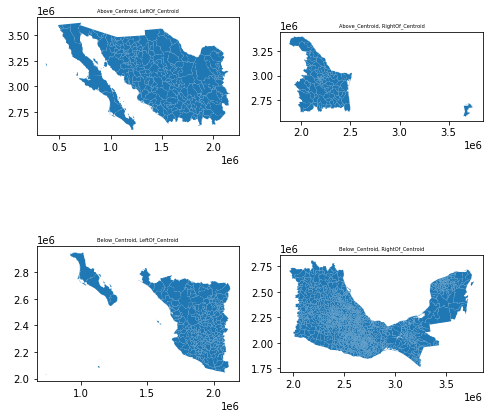

In [36]:
#Dissolving
#Hemos creado un subconjunto del mapa usando clip (subconjunto con respecto a los límites de otro mapa). También puede crear subconjuntos usando loc o iloc (de pandas); 
#permítanme ahora subconjunto usando cx de geopandas para hacer subconjuntos por ubicación:

centroMexico=mexico_6366.centroid


fig, axs = pyplot.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))

axs[0,0].set_title('Above_Centroid, LeftOf_Centroid',fontsize=5)
mexico_municipalities_6366.cx[:centroMexico.x,centroMexico.y:].plot(ax=axs[0,0]) 

axs[0,1].set_title('Above_Centroid, RightOf_Centroid',fontsize=5)
mexico_municipalities_6366.cx[centroMexico.x:,centroMexico.y:].plot(ax=axs[0,1]) 

axs[1,0].set_title('Below_Centroid, LeftOf_Centroid',fontsize=5)
mexico_municipalities_6366.cx[:centroMexico.x,:centroMexico.y].plot(ax=axs[1,0]) 

axs[1,1].set_title('Below_Centroid, RightOf_Centroid',fontsize=5)
mexico_municipalities_6366.cx[centroMexico.x:,:centroMexico.y].plot(ax=axs[1,1])

In [37]:
#Creamos un poligono con una de estas partes
#En lugar de:
mexico_municipalities_6366.cx[centroMexico.x:,:centroMexico.y]

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry
0,1.139010,0.025369,Abalá,MX31001,Abala,NaN,NaN,Yucatán,MX31,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((3438607.655 2555075.448, 3439155.019..."
2,2.218582,0.053291,Abasolo,MX11001,NaN,NaN,NaN,Guanajuato,MX11,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((2125648.098 2373488.372, 2125645.892..."
5,0.634317,0.010750,Abejones,MX20001,NaN,NaN,NaN,Oaxaca,MX20,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((2701132.356 2063107.309, 2701267.956..."
6,0.936485,0.020883,Acacoyagua,MX07001,NaN,NaN,NaN,Chiapas,MX07,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((3176516.166 1850543.398, 3176510.269..."
7,0.875636,0.015186,Acajete,MX21001,NaN,NaN,NaN,Puebla,MX21,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((2529102.157 2235829.729, 2529618.667..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2452,0.317453,0.001654,Zoquiapan,MX21216,NaN,NaN,NaN,Puebla,MX21,México,MX,2020-06-23,2021-06-18,NaN,"MULTIPOLYGON (((2573673.765 2349603.579, 25739..."
2453,1.141389,0.023020,Zoquitlán,MX21217,Zoquitlan,NaN,NaN,Puebla,MX21,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((2661795.527 2167709.440, 2661864.556..."
2454,0.499022,0.005956,Zozocolco de Hidalgo,MX30203,NaN,NaN,NaN,Veracruz de Ignacio de la Llave,MX30,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((2566659.989 2354857.945, 2566675.424..."
2455,0.738143,0.017342,Zumpahuacán,MX15119,Zumpahuacan,NaN,NaN,México,MX15,México,MX,2020-06-23,2021-06-18,NaN,"POLYGON ((2360785.232 2182272.258, 2360700.791..."


In [38]:
#Creamos
Mexico_topLeft=mexico_municipalities_6366.cx[centroMexico.x:,:centroMexico.y].dissolve()
#Y obtenemos
Mexico_topLeft

,geometry,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo
0,"MULTIPOLYGON (((2209637.083 1988242.915, 22091...",1.13901,0.025369,Abalá,MX31001,Abala,Acambay,NaN,Yucatán,MX31,México,MX,2020-06-23,2021-06-18,NaN


In [39]:
#Aparte de la columna de geometría, podemos observar que el resto está mal, entonces:

Mexico_topLeft['zone']='NW'
Mexico_topLeft=Mexico_topLeft.loc[:,['ADM0_ES','zone','geometry']]   
Mexico_topLeft

,ADM0_ES,zone,geometry
0,México,NW,"MULTIPOLYGON (((2209637.083 1988242.915, 22091..."


<Axes: >

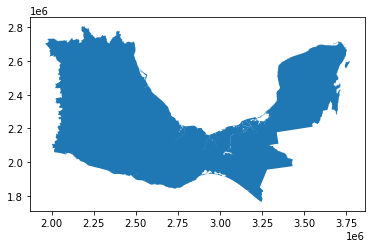

In [40]:
#Este es el trazo

Mexico_topLeft.plot()

In [41]:
#Tenemos que tener en cuenta que con la funcion CX es posible que no obtengamos una particion perfecta:

rowsCX=(mexico_municipalities_6366.cx[:centroMexico.x,centroMexico.y:].shape[0],\
mexico_municipalities_6366.cx[centroMexico.x,centroMexico.y:].shape[0],\
mexico_municipalities_6366.cx[:centroMexico.x,centroMexico.y].shape[0],\
mexico_municipalities_6366.cx[centroMexico.x,centroMexico.y].shape[0])
sum(rowsCX)

235

In [42]:
#Entonces, tienes polígonos duplicados en las zonas (Preguntar al profesor):

sum(rowsCX)-mexico_municipalities_6366.shape[0]

-2222

In [43]:
#Ejercicio 5 (crédito extra - opcional)
#Busque algunos puntos en un archivo CSV sobre su país.

#Convierte esos puntos en un objeto espacial.

#Guardar la capa.

In [44]:
#Creación de datos espaciales
#Obtendrá Líneas y Polígonos como mapas con seguridad, pero ese puede no ser el caso con los puntos. Descargamos un archivo CSV 
#con información sobre los aeropuertos de Mexico de este sitio web, lo guardaré en mi carpeta de datos:
import pandas as pd 
infoairports=pd.read_csv(os.path.join("data","mx-airports.csv"))

#Visualizamos algunas filas:

infoairports.iloc[[0,1,2,3,-4,-3,-2,-1],:] #head and tail

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,#meta +id,#meta +code,#loc +airport +type,#loc +airport +name,#geo +lat,#geo +lon,#geo +elevation +ft,#region +continent +code,#country +name,#country +code +iso2,...,#loc +municipality +name,#status +scheduled,#loc +airport +code +gps,#loc +airport +code +iata,#loc +airport +code +local,#meta +url +airport,#meta +url +wikipedia,#meta +keywords,#meta +score,#date +updated
1,4762,MMUN,large_airport,Aeropuerto Internacional de Cancún,21.039444,-86.874304,22,NaN,Mexico,MX,...,Ciudad de Cancún,1,MMUN,CUN,NaN,http://www.asur.com.mx/asur/ingles/aeropuertos...,https://en.wikipedia.org/wiki/Canc%C3%BAn_Inte...,NaN,51150,2022-12-18T15:21:21+00:00
2,4731,MMMX,large_airport,Aeropuerto Internacional Lic. Benito Juárez,19.435433,-99.082432,7316,NaN,Mexico,MX,...,Ciudad de México,1,MMMX,MEX,ME1,https://www.aicm.com.mx,https://en.wikipedia.org/wiki/Mexico_City_Inte...,AICM,1025275,2022-12-18T11:26:51+00:00
3,4745,MMPR,large_airport,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,20.679746,-105.246685,23,NaN,Mexico,MX,...,Ciudad de Puerto Vallarta,1,MMPR,PVR,NaN,http://vallarta.aeropuertosgap.com.mx/index.ph...,https://en.wikipedia.org/wiki/Lic._Gustavo_D%C...,Licenciado Gustavo Díaz Ordaz,1150,2022-12-18T13:32:23+00:00
2258,348906,MX-1733,closed,El Capitán Airport,28.8396,-101.23808,1434,NaN,Mexico,MX,...,Zaragoza,0,NaN,NaN,NaN,NaN,NaN,NaN,0,2021-10-18T17:57:29+00:00
2259,330990,MX-1046,heliport,Aero Anáhuac Heliport,19.516706,-100.41015,7546,NaN,Mexico,MX,...,Zitacuaro,0,NaN,NaN,HZI,NaN,NaN,NaN,0,2019-04-13T11:37:14+00:00
2260,319121,MX-0184,heliport,Jupiter I Platform Helipad,19.520472,-92.184506,50,NaN,Mexico,MX,...,Zonda De Campeche,0,NaN,NaN,HJU,NaN,NaN,NaN,0,2016-06-25T00:38:37+00:00
2261,329377,MX-0869,heliport,Safe Regency Platform Heliport,19.400092,-92.039283,33,NaN,Mexico,MX,...,Zonda de Campeche,0,NaN,NaN,HPR,NaN,NaN,NaN,0,2018-09-30T20:05:24+00:00


In [45]:
#Realizamos limpieza:

#Borramos la primera fila que no nos sirve
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)
infoairports.head()

,id,ident,type,name,latitude_deg,longitude_deg,elevation_ft,continent,country_name,iso_country,...,municipality,scheduled_service,gps_code,iata_code,local_code,home_link,wikipedia_link,keywords,score,last_updated
0,4762,MMUN,large_airport,Aeropuerto Internacional de Cancún,21.039444,-86.874304,22,NaN,Mexico,MX,...,Ciudad de Cancún,1,MMUN,CUN,NaN,http://www.asur.com.mx/asur/ingles/aeropuertos...,https://en.wikipedia.org/wiki/Canc%C3%BAn_Inte...,NaN,51150,2022-12-18T15:21:21+00:00
1,4731,MMMX,large_airport,Aeropuerto Internacional Lic. Benito Juárez,19.435433,-99.082432,7316,NaN,Mexico,MX,...,Ciudad de México,1,MMMX,MEX,ME1,https://www.aicm.com.mx,https://en.wikipedia.org/wiki/Mexico_City_Inte...,AICM,1025275,2022-12-18T11:26:51+00:00
2,4745,MMPR,large_airport,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,20.679746,-105.246685,23,NaN,Mexico,MX,...,Ciudad de Puerto Vallarta,1,MMPR,PVR,NaN,http://vallarta.aeropuertosgap.com.mx/index.ph...,https://en.wikipedia.org/wiki/Lic._Gustavo_D%C...,Licenciado Gustavo Díaz Ordaz,1150,2022-12-18T13:32:23+00:00
3,4750,MMSD,large_airport,Aeropuerto Internacional de Los Cabos,23.15642,-109.716811,374,NaN,Mexico,MX,...,Ciudad de San José del Cabo,1,MMSD,SJD,NaN,http://loscabos.aeropuertosgap.com.mx/index.ph...,https://en.wikipedia.org/wiki/Los_Cabos_Intern...,NaN,1150,2022-12-18T15:24:06+00:00
4,4710,MMGL,large_airport,Aeropuerto Internacional Miguel Hidalgo,20.52504,-103.301557,5016,NaN,Mexico,MX,...,Ciudad de Tlajomulco de Zúñiga,1,MMGL,GDL,NaN,NaN,https://en.wikipedia.org/wiki/Don_Miguel_Hidal...,NaN,1275,2022-12-18T13:34:18+00:00


In [46]:
#Mantenemos las columnas necesarias

infoairports.columns.to_list()

['id',
 'ident',
 'type',
 'name',
 'latitude_deg',
 'longitude_deg',
 'elevation_ft',
 'continent',
 'country_name',
 'iso_country',
 'region_name',
 'iso_region',
 'local_region',
 'municipality',
 'scheduled_service',
 'gps_code',
 'iata_code',
 'local_code',
 'home_link',
 'wikipedia_link',
 'keywords',
 'score',
 'last_updated']

In [47]:
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]

In [48]:
#Verificamos el tipo de las variables:
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           2261 non-null   object
 1   type           2261 non-null   object
 2   latitude_deg   2261 non-null   object
 3   longitude_deg  2261 non-null   object
 4   elevation_ft   2012 non-null   object
 5   region_name    2261 non-null   object
 6   municipality   2247 non-null   object
dtypes: object(7)
memory usage: 123.8+ KB


In [49]:
#Alguno de los formatos
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

#Ahora
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2261 entries, 0 to 2260
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           2261 non-null   object 
 1   type           2261 non-null   object 
 2   latitude_deg   2261 non-null   float64
 3   longitude_deg  2261 non-null   float64
 4   elevation_ft   2012 non-null   float64
 5   region_name    2261 non-null   object 
 6   municipality   2247 non-null   object 
dtypes: float64(3), object(4)
memory usage: 123.8+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

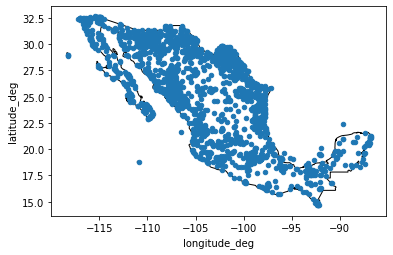

In [50]:
#Trazamos el mapa con los aeropuertos

base = mexico.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [51]:
#Convertimos las coordenadas en un mapa de puntos:

airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg), 
                 crs=mexico.crs.to_epsg())# the coordinates were in degrees - unprojected

<Axes: >

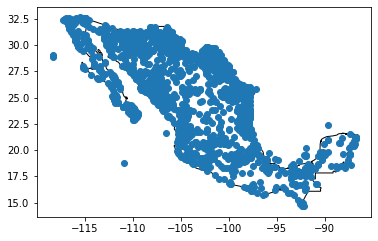

In [52]:
#Ahora trazamos

base = mexico.plot(color='white', edgecolor='black')
airports.plot(ax=base)

In [53]:
#Recordamos el tipo:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

<Axes: >

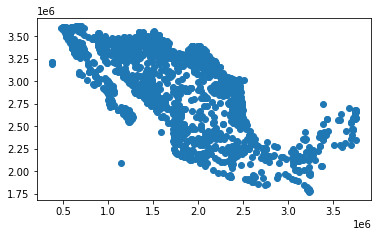

In [54]:
#Como funciona trazamos
airports.to_crs(6366).plot()

In [55]:
#Este no lo grafica:
infoairports.to_crs(6366).plot()

AttributeError: AttributeError: 'DataFrame' object has no attribute 'to_crs'

In [56]:
#Mantenemos la versión proyectada:

airports_6366=airports.to_crs(6366)

In [57]:
#Verificamos que tenemos diferentes tipos de aeropuerto
airports_6366['type'].value_counts() # this will not work: airports.type.value_counts()

small_airport 1376
heliport 415
closed 396
medium_airport 52
large_airport 16
seaplane_base 6
Name: type, dtype: int64

In [58]:
#Cambiamos el nombre de la columna de "Type" a una diferente
airports_6366.rename(columns={'type':'kind'},inplace=True)

In [59]:
#Graficamos de una manera dinamica
from folium import LayerControl


m = airports_6366[airports_6366.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports_6366[airports_6366.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports_6366[airports_6366.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports_6366[airports_6366.kind=='seaplane_base'].explore(m=m, color="green",name="seaplane",show=False)
m = airports_6366[airports_6366.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports_6366[airports_6366.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_bde0bacdf2126ce5bf6607d89d745ef8 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_bde0bacdf2126ce5bf6607d89d745ef8" ></div>
 
</body>
<script>
 
 
 var map_bde0bacdf2126ce5bf6607d89d745ef8 = L.map(
 "map_bde0bacdf2126ce5bf6607d89d745ef8",
 {
 center: [23.632326999999997, -102.506891],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_bde0bacdf2126ce5bf6607d89d745ef8);

 

 
 
 var tile_layer_af62ee002927b398dabd4cd5e39bf214 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_bde0bacdf2126ce5bf6607d89d745ef8);
 
 
 map_bde0bacdf2126ce5bf6607d89d745ef8.fitBounds(
 [[14.639443999999997, -118.273417], [32.625209999999996, -86.74036500000001]],
 {}
 );
 
 
 function geo_json_c1

In [60]:
#Ahora agregamos este mapa de puntos
airports_6366.to_file(os.path.join("maps","mexicoMaps_6366.gpkg"),layer='airports', driver="GPKG")

In [61]:
#Ejercicio 6
#Seleccione algunos puntos de sus mapas.

#Crea el casco convexo para esos puntos.

#Convierte el casco en un GDF.

#Trazar el casco en la parte superior del país.

In [62]:
#Creando el casco convexo
#En algún momento puede que tengas la necesidad de crear un polígono que sirva de envolvente a un conjunto de puntos. Como sobre, debe tener solo ángulos convexos. Ese sobre es el casco convexo:

# en un polígono
Mexico_topLeft

,ADM0_ES,zone,geometry
0,México,NW,"MULTIPOLYGON (((2209637.083 1988242.915, 22091..."


<Axes: >

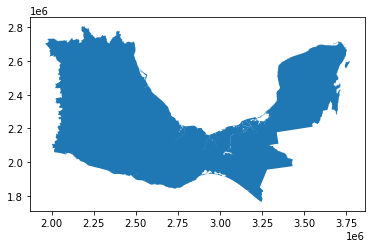

In [63]:
Mexico_topLeft.plot()

In [64]:
Mexico_topLeft.convex_hull

0 POLYGON ((3244547.231 1763000.459, 2731924.662...
dtype: geometry

<Axes: >

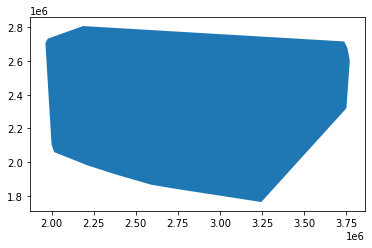

In [65]:
#Graficamos el poligono convexo 
Mexico_topLeft.convex_hull.plot()

In [66]:
#Observe que el casco convexo funciona para cada fila de la geometría. Brazil_topLeft era una fila de geometría, por lo que el casco convexo era sencillo.

#Esto podría ser diferente si tiene puntos:
large_airport=airports_6366[airports_6366.kind=='large_airport']
#Varias filas
large_airport

,name,kind,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Aeropuerto Internacional de Cancún,large_airport,21.039444,-86.874304,22.0,Quintana Roo,Ciudad de Cancún,POINT (3741409.252 2653792.191)
1,Aeropuerto Internacional Lic. Benito Juárez,large_airport,19.435433,-99.082432,7316.0,Ciudad de México,Ciudad de México,POINT (2405228.229 2250478.724)
2,Aeropuerto Internacional Lic. Gustavo Díaz Ordaz,large_airport,20.679746,-105.246685,23.0,Jalisco,Ciudad de Puerto Vallarta,POINT (1730617.034 2331720.217)
3,Aeropuerto Internacional de Los Cabos,large_airport,23.156420,-109.716811,374.0,Baja California Sur,Ciudad de San José del Cabo,POINT (1246928.023 2579572.848)
4,Aeropuerto Internacional Miguel Hidalgo,large_airport,20.525040,-103.301557,5016.0,Jalisco,Ciudad de Tlajomulco de Zúñiga,POINT (1938524.286 2330692.695)
5,Aeropuerto Internacional Gral. Mariano Escobedo,large_airport,25.778561,-100.113602,1278.0,Nuevo León,Ciudad de Apodaca,POINT (2208509.802 2962808.099)
6,Aeropuerto Internacional Manuel Crescencio Rejón,large_airport,20.933384,-89.662621,38.0,Yucatán,Ciudad de Mérida,POINT (3425485.016 2578245.185)
7,Aeropuerto Internacional Juan N. Álvarez,large_airport,16.762118,-99.755473,16.0,Guerrero,Ciudad de Acapulco,POINT (2361518.161 1935834.413)
8,Aeropuerto Internacional Gral. Abelardo Rodriguez,large_airport,32.545963,-116.975856,489.0,Baja California,Ciudad de Tijuana,POINT (502266.913 3600954.444)
9,Aeropuerto Internacional de Cozumel,large_airport,20.511425,-86.930287,15.0,Quintana Roo,Ciudad de Cozumel,POINT (3748297.771 2587612.436)


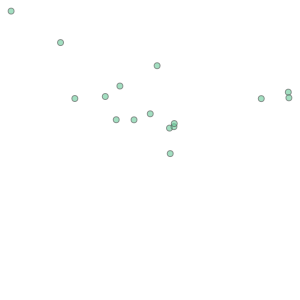

In [67]:
#En esta situación, como desea el casco convexo de los grandes aeropuertos, debe combinar todos los puntos:
large_airport.unary_union

In [68]:
#Esta es una geometría multipuntos
gpd.GeoSeries(large_airport.unary_union)

0 MULTIPOINT (502266.913 3600954.444, 1079741.81...
dtype: geometry

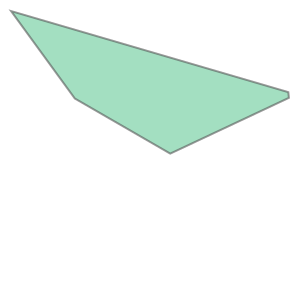

In [69]:
#Ahora sí obtenemos el casco convexo
large_airport.unary_union.convex_hull

In [70]:
#Observamos el tipo:
type(large_airport.unary_union.convex_hull)

shapely.geometry.polygon.Polygon

In [71]:
#Observamos que no funciona con una geometría
large_airport.unary_union.convex_hull.plot()

AttributeError: AttributeError: 'Polygon' object has no attribute 'plot'

<Axes: >

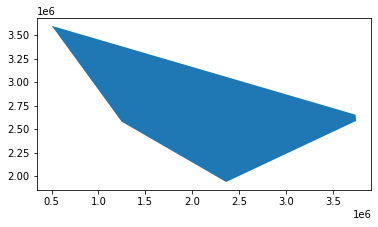

In [72]:
#Pero sí es una serie
gpd.GeoSeries(large_airport.unary_union.convex_hull).plot()

In [73]:
#Convertimos la GS a una GDF
LargeAirport_hull=gpd.GeoSeries(large_airport.unary_union.convex_hull).to_frame()
LargeAirport_hull

,0
0,"POLYGON ((2361518.161 1935834.413, 1246928.023..."


In [74]:
#Los siguientes pasos
LargeAirport_hull.rename(columns={0:'geometry'},inplace=True)
LargeAirport_hull['name']='large airports hull' # optional
LargeAirport_hull=LargeAirport_hull.set_geometry('geometry')
LargeAirport_hull.crs="EPSG:6366"
#Verificamos:
LargeAirport_hull.crs

<Projected CRS: EPSG:6366>
Name: Mexico ITRF2008 / UTM zone 11N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Mexico west of 114°W, onshore and offshore.
- bounds: (-122.19, 15.01, -114.0, 32.72)
Coordinate Operation:
- name: UTM zone 11N
- method: Transverse Mercator
Datum: Mexico ITRF2008
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

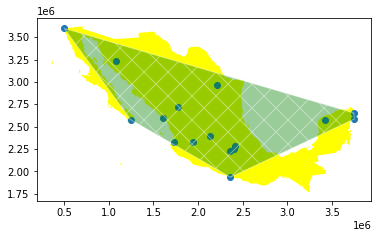

In [75]:
#Usamos el GDF en el trazado
base=mexico_6366.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [76]:
LargeAirport_hull.explore()

Make this Notebook Trusted to load map: File -> Trust Notebook <iframe srcdoc="<!DOCTYPE html>
<html>
<head>
 
 <meta http-equiv="content-type" content="text/html; charset=UTF-8" />
 
 <script>
 L_NO_TOUCH = false;
 L_DISABLE_3D = false;
 </script>
 
 <style>html, body {width: 100%;height: 100%;margin: 0;padding: 0;}</style>
 <style>#map {position:absolute;top:0;bottom:0;right:0;left:0;}</style>
 <script src="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.js"></script>
 <script src="https://code.jquery.com/jquery-1.12.4.min.js"></script>
 <script src="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/js/bootstrap.bundle.min.js"></script>
 <script src="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.js"></script>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/leaflet@1.9.3/dist/leaflet.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/bootstrap@5.2.2/dist/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://netdna.bootstrapcdn.com/bootstrap/3.0.0/css/bootstrap.min.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/npm/@fortawesome/fontawesome-free@6.2.0/css/all.min.css"/>
 <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/Leaflet.awesome-markers/2.0.2/leaflet.awesome-markers.css"/>
 <link rel="stylesheet" href="https://cdn.jsdelivr.net/gh/python-visualization/folium/folium/templates/leaflet.awesome.rotate.min.css"/>
 
 <meta name="viewport" content="width=device-width,
 initial-scale=1.0, maximum-scale=1.0, user-scalable=no" />
 <style>
 #map_a771b9cfb767f216b0b6aeabf0d271a7 {
 position: relative;
 width: 100.0%;
 height: 100.0%;
 left: 0.0%;
 top: 0.0%;
 }
 .leaflet-container { font-size: 1rem; }
 </style>
 
 
 <style>
 .foliumtooltip {
 
 }
 .foliumtooltip table{
 margin: auto;
 }
 .foliumtooltip tr{
 text-align: left;
 }
 .foliumtooltip th{
 padding: 2px; padding-right: 8px;
 }
 </style>
 
</head>
<body>
 
 
 <div class="folium-map" id="map_a771b9cfb767f216b0b6aeabf0d271a7" ></div>
 
</body>
<script>
 
 
 var map_a771b9cfb767f216b0b6aeabf0d271a7 = L.map(
 "map_a771b9cfb767f216b0b6aeabf0d271a7",
 {
 center: [24.6540405, -101.92508000000001],
 crs: L.CRS.EPSG3857,
 zoom: 10,
 zoomControl: true,
 preferCanvas: false,
 }
 );
 L.control.scale().addTo(map_a771b9cfb767f216b0b6aeabf0d271a7);

 

 
 
 var tile_layer_92fe5df5b8ac7d3664d9f063c03e2d69 = L.tileLayer(
 "https://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png",
 {"attribution": "Data by \u0026copy; \u003ca target=\"_blank\" href=\"http://openstreetmap.org\"\u003eOpenStreetMap\u003c/a\u003e, under \u003ca target=\"_blank\" href=\"http://www.openstreetmap.org/copyright\"\u003eODbL\u003c/a\u003e.", "detectRetina": false, "maxNativeZoom": 18, "maxZoom": 18, "minZoom": 0, "noWrap": false, "opacity": 1, "subdomains": "abc", "tms": false}
 ).addTo(map_a771b9cfb767f216b0b6aeabf0d271a7);
 
 
 map_a771b9cfb767f216b0b6aeabf0d271a7.fitBounds(
 [[16.762118, -116.97585600000001], [32.545963, -86.87430400000001]],
 {}
 );
 
 
 function geo_json_ef7cbca00ad4263ccadb07df265dd4df_styler(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.5, "weight": 2};
 }
 }
 function geo_json_ef7cbca00ad4263ccadb07df265dd4df_highlighter(feature) {
 switch(feature.id) {
 default:
 return {"fillOpacity": 0.75};
 }
 }
 function geo_json_ef7cbca00ad4263ccadb07df265dd4df_pointToLayer(feature, latlng) {
 var opts = {"bubblingMouseEvents": true, "color": "#3388ff", "dashArray": null, "dashOffset": null, "fill": true, "fillColor": "#3388ff", "fillOpacity": 0.2, "fillRule": "evenodd", "lineCap": "round", "lineJoin": "round", "opacity": 1.0, "radius": 2, "stroke": true, "weight": 3};
 
 let style = geo_json_ef7cbca00ad4263ccadb07df265dd4df_styler(feature)
 Object.assign(opts, style)
 
 return new L.CircleMarker(latlng, opts)
 }

 function geo_json_ef7cbca00ad4263ccadb07df265dd4df_onEachFeature(feature, layer) {
 layer.on({
 mouseout: function(e) {
 if(typeof e.target.setStyle === "fu

In [77]:
#Ejercicio 7
#Compruebe si todos sus polígonos son válidos en cada mapa que tenga (solo mapa de polígonos).

#Si detecta algunas geometrías no válidas, detecte cuál es el problema.

#Corregir todos los casos. No guarde los resultados.

In [78]:
#Comprobación de la validez de la geometría
Las #geometrías se crean de manera que pueden aparecer algunos problemas, especialmente en (múltiples) polígonos. Verifiquemos si nuestros mapas recientes sobre estados y municipios son válidos:

# no válido
#Observamos que no hay ningun dato invalido
mexico_states_6366[~mexico_states_6366.is_valid]

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry


/opt/python/envs/default/lib/python3.8/site-packages/geopandas/plotting.py:695: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


<Axes: >

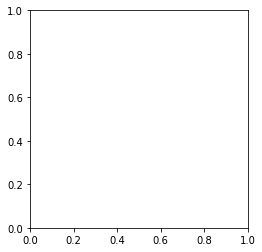

In [79]:
#Miramos los datos invalidos:
mexico_states_6366[~mexico_states_6366.is_valid].plot()

In [80]:
#Es difícil ver lo que está mal. Consigamos algo de información:

# ¿lo que está mal?

from shapely.validation import explain_validity, make_valid

explain_validity(mexico_states_6366[~mexico_states_6366.is_valid].geometry)

GeoSeries([], Name: geometry, dtype: geometry)

In [81]:
#Si hubiera algun problema, lo podemos resolver de esta manera
MxSt6366_valid=mexico_states_6366[~mexico_states_6366.is_valid].copy()
# resolviendo el problema:
MxSt6366_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in MxSt6366_valid['geometry'] ]

In [82]:
#Alguna invalida?
MxSt6366_valid[~MxSt6366_valid.is_valid]

,ADM1_ES,ADM1_PCODE,ADM1_REF,ADM1ALT1ES,ADM1ALT2ES,ADM0_ES,ADM0_PCODE,date,validOn,validTo,Shape_Leng,Shape_Area,geometry


In [83]:
#¿Qué pasa con el otro geodataframe?

mexico_municipalities_6366[~mexico_municipalities_6366.is_valid]

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry


In [84]:
explain_validity(mexico_municipalities_6366[~mexico_municipalities_6366.is_valid].geometry)

GeoSeries([], Name: geometry, dtype: geometry)

In [85]:
#Variedades?
mexico_municipalities_6366['validity']=[x.split('[')[0] for x in mexico_municipalities_6366.geometry.apply(lambda x: explain_validity(x))]
mexico_municipalities_6366['validity'].value_counts()

Valid Geometry 2457
Name: validity, dtype: int64

In [86]:
#Resolviendo el problema:
mexico_municipalities_6366.drop(columns=['validity'],inplace=True)

MxMun6366_valid=mexico_municipalities_6366.copy()

MxMun6366_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in MxMun6366_valid['geometry'] ]
#any invalid?
MxMun6366_valid[~MxMun6366_valid.is_valid]

,Shape_Leng,Shape_Area,ADM2_ES,ADM2_PCODE,ADM2_REF,ADM2ALT1ES,ADM2ALT2ES,ADM1_ES,ADM1_PCODE,ADM0_ES,ADM0_PCODE,date,validOn,validTo,geometry


In [87]:
#La solución que obtuvimos puede ayudar con algunas técnicas avanzadas, pero también puede darnos algunos problemas adicionales. Tenga en cuenta que una vez que geopandas resolvió el problema, ha creado colecciones:

[x for x in MxMun6366_valid["geometry"]]

[<POLYGON ((3438607.655 2555075.448, 3439155.019 2554449.183, 3439786.112 255...>,
 <POLYGON ((2104096.485 3101293.473, 2097257.511 3095179.386, 2097254.715 309...>,
 <POLYGON ((2125648.098 2373488.372, 2125645.892 2373482.918, 2125642.666 237...>,
 <POLYGON ((2178956.604 2982483.668, 2179031.506 2980418.454, 2178846.278 297...>,
 <POLYGON ((2449292.628 2826265.828, 2449446.478 2825205.426, 2450270.113 281...>,
 <POLYGON ((2701132.356 2063107.309, 2701267.956 2063145.917, 2701376.498 206...>,
 <POLYGON ((3176516.166 1850543.398, 3176510.269 1850543.279, 3176492.59 1850...>,
 <POLYGON ((2529102.157 2235829.729, 2529618.667 2235706.021, 2530512.404 223...>,
 <POLYGON ((2627009.738 2298196.867, 2626920.832 2297797.681, 2626839.416 229...>,
 <POLYGON ((3155705.007 2001608.713, 3155428.716 2001682.944, 3154832.816 200...>,
 <POLYGON ((2244972.553 2301854.666, 2244950.562 2301865.217, 2244931.752 230...>,
 <POLYGON ((2305850.446 2312876.063, 2305917.566 2312787.545, 2305984.685 231...>,
 <PO